In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

data = pd.read_csv('leagueoflegends/LeagueofLegends.csv')


In [4]:
data.head()


,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


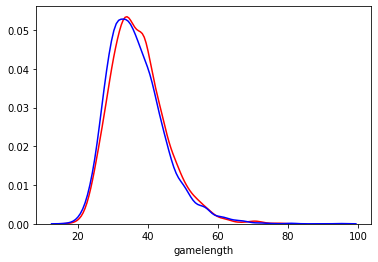

In [6]:
redWins = data[data.rResult == 1]
blueWins = data[data.bResult == 1]

sns.distplot(redWins.gamelength, color='red', hist=False)
sns.distplot(blueWins.gamelength, color='blue', hist=False)

In [7]:
goldData = pd.read_csv('leagueoflegends/goldValues.csv')
# Create minute column names for pd.melt()
minutes = ['min_' + str(x + 1) for x in range(81)]
goldData = pd.melt(goldData, id_vars=['MatchHistory', 'NameType'], value_vars=minutes, 
                   var_name='minute', value_name='gold')
# Changet the minute variable into a integer.
goldData.minute = goldData.minute.str.strip('min_').astype(int)
goldData.head()


,MatchHistory,NameType,minute,gold
0,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
1,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
2,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
3,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
4,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,40.0


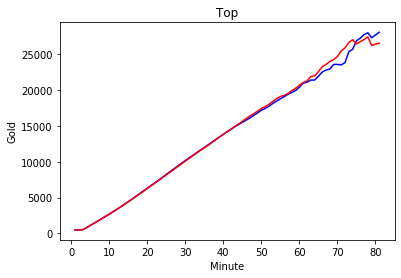

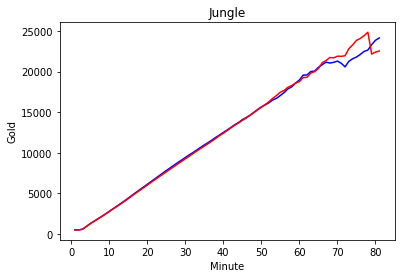

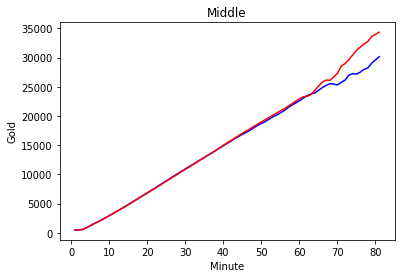

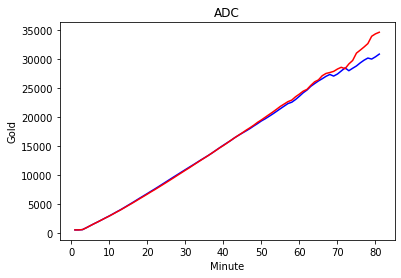

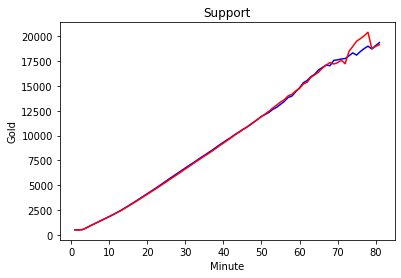

In [8]:
sections = ['Top', 'Jungle', 'Middle', 'ADC', 'Support']
num_sections = len(sections)

for i in range(num_sections):
    plt.figure(i)
    plt.plot(goldData[goldData.NameType == 'goldblue' + sections[i]].groupby('minute').gold.mean(), 'b-')
    plt.plot(goldData[goldData.NameType == 'goldred' + sections[i]].groupby('minute').gold.mean(), 'r-')
    plt.xlabel('Minute')
    plt.ylabel('Gold')
    plt.title(sections[i])